In [1]:
import numpy as np
from matplotlib import pyplot as plt

import fretbursts as frb
import burstH2MM as bhm

filename = 'HP3_TE300_SPC630.hdf5'
# load the data into the data object frbdata
frbdata = frb.loader.photon_hdf5(filename)
# if the alternation period is correct, apply data
# plot the alternation histogram
# frb.bpl.plot_alternation_hist(frbdata) # commented so not displayed in notebook
frb.loader.alex_apply_period(frbdata)
# calcualte the background rate
frbdata.calc_bg(frb.bg.exp_fit, F_bg=1.7)
# plot bg parameters, to verify quality
# frb.dplot(frbdata, frb.hist_bg) # commented so not displayed in notebook
# now perform burst search
frbdata.burst_search(m=10, F=6)
# make sure to set the appropriate thresholds of ALL size
# parameters to the particulars of your experiment
frbdata_sel = frbdata.select_bursts(frb.select_bursts.size, th1=50)
# make BurstData object to get data into bursth2MM
bdata = bhm.BurstData(frbdata_sel)
# calculate models
bdata.models.calc_models()
# set irf_thresh since later in tutorial we will discuss nanotimes
bdata.irf_thresh = np.array([2355, 2305, 220])

 - Optimized (cython) burst search loaded.
 - Optimized (cython) photon counting loaded.
--------------------------------------------------------------
 You are running FRETBursts (version 0.7.1).

 If you use this software please cite the following paper:

   FRETBursts: An Open Source Toolkit for Analysis of Freely-Diffusing Single-Molecule FRET
   Ingargiola et al. (2016). http://dx.doi.org/10.1371/journal.pone.0160716 

--------------------------------------------------------------
# Total photons (after ALEX selection):    11,414,157
#  D  photons in D+A excitation periods:    5,208,392
#  A  photons in D+A excitation periods:    6,205,765
# D+A photons in  D  excitation period:     6,611,308
# D+A photons in  A  excitation period:     4,802,849

 - Calculating BG rates ... get bg th arrays
Channel 0
[DONE]
 - Performing burst search (verbose=False) ...[DONE]
 - Calculating burst periods ...[DONE]
 - Counting D and A ph and calculating FRET ... 
   - Applying background correction

The model converged after 1 iterations

The model converged after 36 iterations

The model converged after 128 iterations

The model converged after 410 iterations

In [2]:
sdata = bhm.sim.simulate(bdata.models[2])

In [3]:
sdata.dwell_E

array([0.08108108, 0.5       , 0.65625   , ..., 0.25      , 0.13793103,
       1.        ])

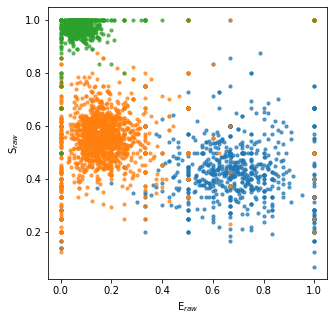

In [4]:
fig, ax = plt.subplots(figsize=(5,5))
bhm.dwell_ES_scatter(sdata, ax=ax)